# Código para classificação de tumores cancerígenos entre Malignos e Benignos usando redes neurais

## Importando as bibliotecas necessárias

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## Passo 1: Carregar o conjunto de dados sem cabeçalhos (nomes de colunas)

In [19]:
df = pd.read_csv('cancer.csv', header=None)

## Passo 2: Pré-processamento dos dados
A primeira coluna (índice 0) é 'ID number' e a segunda coluna (índice 1) é 'Diagnosis' \
Vamos ignorar a coluna ID e codificar a coluna Diagnosis ('M' = 1, 'B' = 0) \
Codificar a coluna Diagnosis (M = 1, B = 0) na segunda coluna (índice 1)

In [21]:
label_encoder = LabelEncoder()
df[1] = label_encoder.fit_transform(df[1])  # A coluna de índice 1 corresponde a 'Diagnosis'
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Passo 3: Dividir os dados em características (X) e rótulos (y)
X será todas as colunas do índice 2 até o final (características), e y será a coluna de índice 1 (Diagnosis)

In [25]:
X = df.iloc[:, 2:]  # Seleciona todas as colunas do índice 2 até o final (30 características)
y = df.iloc[:, 1]   # A coluna de índice 1 é 'Diagnosis'

X.head(), y.head()


(      2      3       4       5        6        7       8        9       10  \
 0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
 1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
 2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
 3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
 4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   
 
         11  ...     22     23      24      25      26      27      28      29  \
 0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
 1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
 2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
 3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
 4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   
 
        30       31  
 0  0.46

## Passo 4: Dividir os dados em treino (70%) e teste (30%)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Passo 5: Normalizar os valores das características usando StandardScaler

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Passo 6: Construção da rede neural

In [28]:
model = Sequential()

Camada de entrada e primeira camada oculta

In [29]:
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # 16 neurônios, ativação relu

/home/romulo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Segunda camada oculta


In [30]:
model.add(Dense(8, activation='relu'))  # 8 neurônios


Camada de saída (classificação binária: 0 ou 1)

In [31]:
model.add(Dense(1, activation='sigmoid'))  # Sigmoid para classificação binária

Compilar o modelo


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Passo 7: Treinar o modelo


In [33]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4162 - loss: 1.0379 - val_accuracy: 0.7250 - val_loss: 0.6101
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7737 - loss: 0.5341 - val_accuracy: 0.9000 - val_loss: 0.3881
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.3699 - val_accuracy: 0.9500 - val_loss: 0.2857
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9366 - loss: 0.2845 - val_accuracy: 0.9250 - val_loss: 0.2259
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9276 - loss: 0.2400 - val_accuracy: 0.9500 - val_loss: 0.1857
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9549 - loss: 0.1787 - val_accuracy: 1.0000 - val_loss: 0.1575
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9605 - loss: 0.1601 - val_accuracy: 1.0000 - val_loss: 0.1367
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9562 - loss: 0.1604 - val_accuracy: 1.0000 - val_loss

## Passo 8: Avaliar o modelo

In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')
print(f"Loss do teste: {loss}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.0942 
Acurácia no teste: 97.66%
Loss do teste: 0.08300051838159561


# Passo 9: Fazer predição com novos dados
Neste exemplo utilizei valores ficticios para a nova amostra, apenas para testar

In [44]:
nova_amostra = np.array([[12.34, 14.56, 85.67, 520.0, 0.09234, 0.06456, 0.0321, 0.021, 0.1500, 0.0600,
                          0.5001, 1.205, 3.200, 48.50, 0.00845, 0.00567, 0.0023, 0.00156, 0.02543, 0.00412,
                          14.02, 19.23, 98.78, 600.4, 0.12345, 0.07892, 0.04567, 0.0289, 0.1723, 0.06543]])


Normalização da amostra para garantir que o scaler foi treinado nos dados de treino

In [45]:
nova_amostra_normalizada = scaler.transform(nova_amostra)

Fazendo a predição com o modelo

In [46]:
predicao = model.predict(nova_amostra_normalizada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Convertendo para binário

In [47]:
predicao_categoria = (predicao > 0.5).astype(int)

Exibindo o resultado

In [48]:
print("Malignant" if predicao == 1 else "Benign")

A amostra foi classificada como Benigna (B).


# Visualização dos dados
## Importação das bibliotecas 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

## Passo 1: Visualizar a distribuição das classes (benigno e maligno)

/tmp/ipykernel_16035/3341389679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.iloc[:, 1], palette='viridis')  # Usando a coluna de diagnóstico (índice 1)


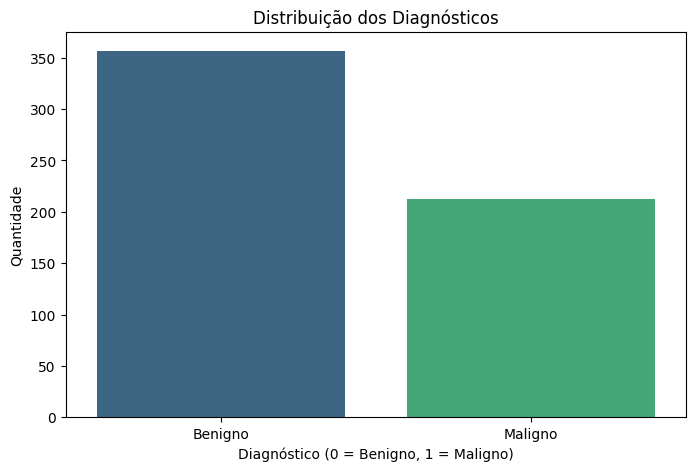

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.iloc[:, 1], palette='viridis')  # Usando a coluna de diagnóstico (índice 1)
plt.title('Distribuição dos Diagnósticos')
plt.xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)')
plt.ylabel('Quantidade')
plt.xticks(ticks=[0, 1], labels=['Benigno', 'Maligno'])
plt.show()  # Exibindo o gráfico

## Passo 2: Boxplot para uma característica específica

/tmp/ipykernel_16035/1060967143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.iloc[:, 1], y=df.iloc[:, 2], palette='viridis')  # Exibindo a característica na coluna 2


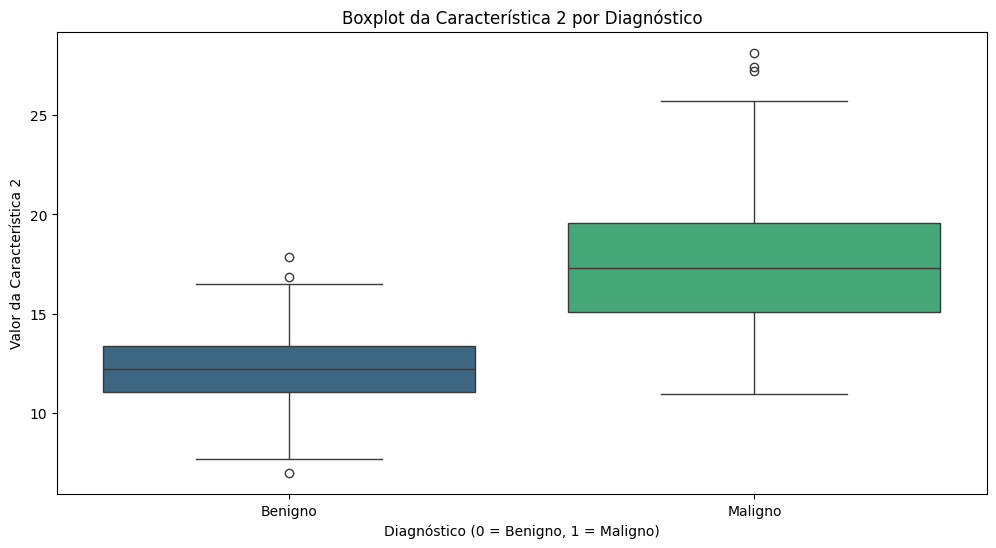

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df.iloc[:, 1], y=df.iloc[:, 2], palette='viridis')  # Exibindo a característica na coluna 2
plt.title('Boxplot da Característica 2 por Diagnóstico')
plt.xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)')
plt.ylabel('Valor da Característica 2')
plt.xticks(ticks=[0, 1], labels=['Benigno', 'Maligno'])
plt.show()  # Exibindo o boxplot

## Passo 3: Matriz de Correlação

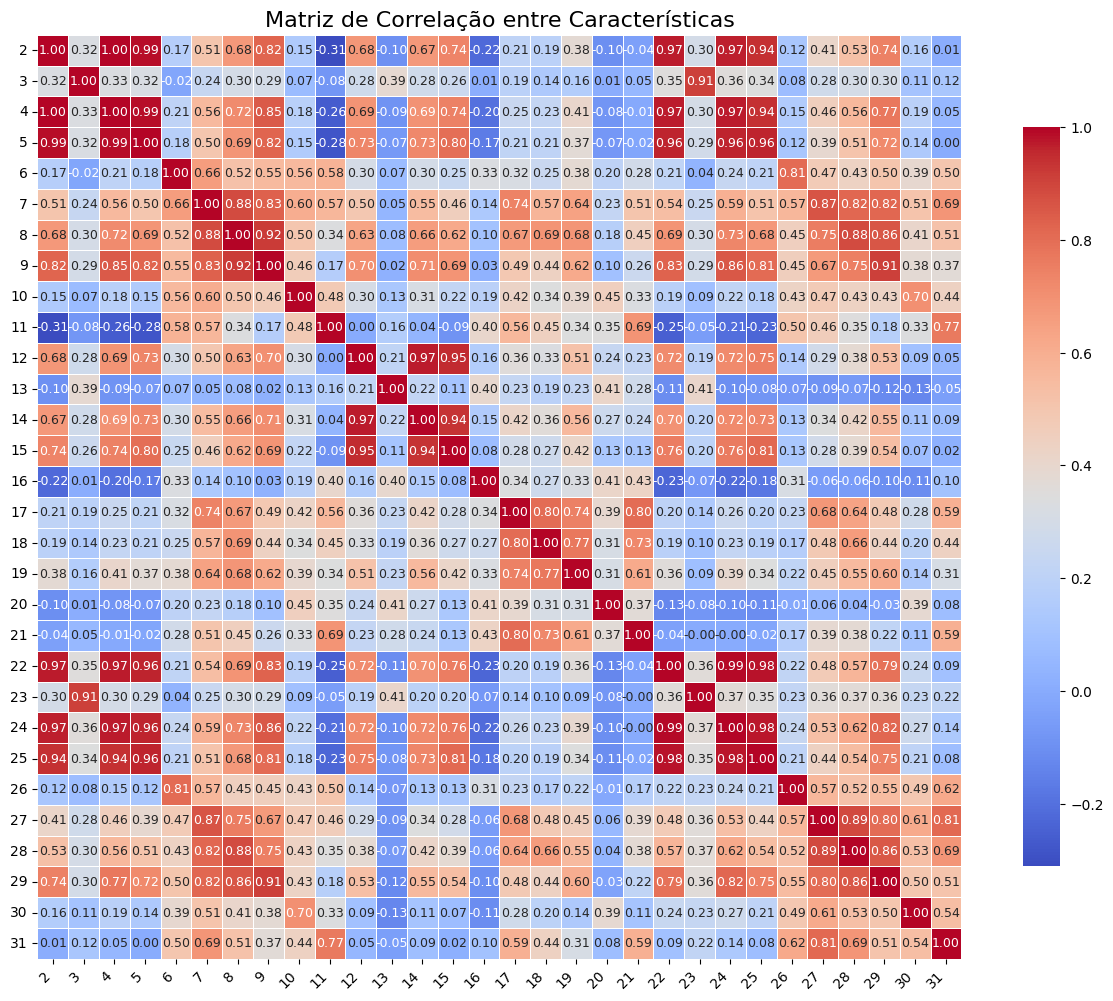

In [38]:
plt.figure(figsize=(16, 12))  # Aumentando o tamanho da figura
correlation_matrix = df.iloc[:, 2:].corr()  # Calculando a matriz de correlação das características

# Criando a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 9},  # Diminuindo o tamanho da fonte dos rótulos
            linewidths=.5)  # Adicionando linhas entre os quadrados

# Rotacionando os rótulos dos eixos
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotacionar os rótulos do eixo x
plt.yticks(rotation=0, fontsize=10)  # Manter os rótulos do eixo y na horizontal
plt.title('Matriz de Correlação entre Características', fontsize=16)  # Aumentando o tamanho do título
plt.show()  # Exibindo a matriz de correlação

## Passo 4: Histogramas para visualizar a distribuição das características

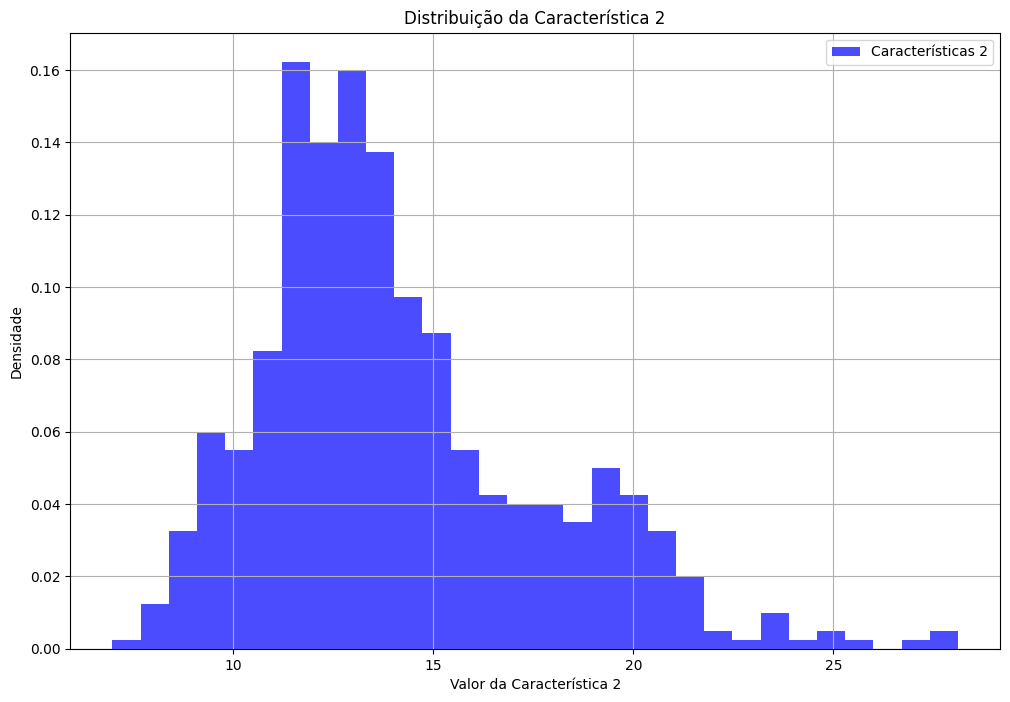

In [39]:
plt.figure(figsize=(12, 8))
df.iloc[:, 2].hist(bins=30, alpha=0.7, color='blue', label='Características 2', density=True)  # Histograma da coluna 2
plt.title('Distribuição da Característica 2')
plt.xlabel('Valor da Característica 2')
plt.ylabel('Densidade')
plt.legend()
plt.show()  # Exibindo o histograma